# 16. KNN - K-Nearest Neighbor

In [1]:
# Importing library
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# 16. 1)-1
def euclidean_dist(data1, data2):
    return np.sqrt(np.sum(data1-data2)**2)

#16. 1)-2
def manhattan(data1, data2):
    return np.sum(np.abs(data1-data2))

# Sample data
X_train, y_train = make_classification(n_samples = 50, n_features = 2, n_informative = 2, n_redundant = 0, n_classes = 2)

In [3]:
# predict X_test data
# 16. 1)-3

# Finding k-nearest neighbors
def find_k_neighbors(X_train, y_train, X_test, k, distance_metric):
    distances = [(distance_metric(x, X_test), label) for x, label in zip(X_train, y_train)]
    return sorted(distances, key=lambda x: x[0])[:k]

X_train, y_train = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Predict the target value for test point
X_test = np.array([0.5, -0.5])  
k = 3

# Compute neighbors and Euclidean distance
neighbors = find_k_neighbors(X_train, y_train, X_test, k, euclidean_dist)
print("Neighbors using Euclidean distance:")
for dist, label in neighbors:
    print(f"Distance: {dist:.4f}, Label: {label}")

labels = [label for _, label in neighbors]
predicted_label = Counter(labels).most_common(1)[0][0]
print(f"Predicted label for X test: {predicted_label}")

# Compute neighbors and Manhattan distance 
neighbors_manhattan = find_k_neighbors(X_train, y_train, X_test, k, manhattan)
print("Neighbors using Manhattan distance:")
for dist, label in neighbors_manhattan:
    print(f"Distance: {dist:.4f}, Label: {label}")

labels_manhattan = [label for _, label in neighbors_manhattan]
predicted_label_manhattan = Counter(labels_manhattan).most_common(1)[0][0]
print(f"Predicted label using Manhattan distance: {predicted_label_manhattan}")


Neighbors using Euclidean distance:
Distance: 0.0017, Label: 1
Distance: 0.0338, Label: 0
Distance: 0.0985, Label: 0
Predicted label for X test: 0
Neighbors using Manhattan distance:
Distance: 0.4564, Label: 1
Distance: 0.4691, Label: 1
Distance: 0.4693, Label: 1
Predicted label using Manhattan distance: 1


In [4]:
# 2) [4 pts] Show a plot of accuracy vs number of neighbors

def compute_accuracy(X_train, y_train, distance_metric):
    accuracies = []
    for k in range(1, len(X_train) + 1):
        predictions = []
        for i, x_test in enumerate(X_train):
            neighbors = find_k_neighbors(X_train, y_train, x_test, k, distance_metric)
            labels = [label for _, label in neighbors]
            predicted_label = Counter(labels).most_common(1)[0][0]
            predictions.append(predicted_label)
        accuracy = accuracy_score(y_train, predictions)
        accuracies.append(accuracy)
    return accuracies



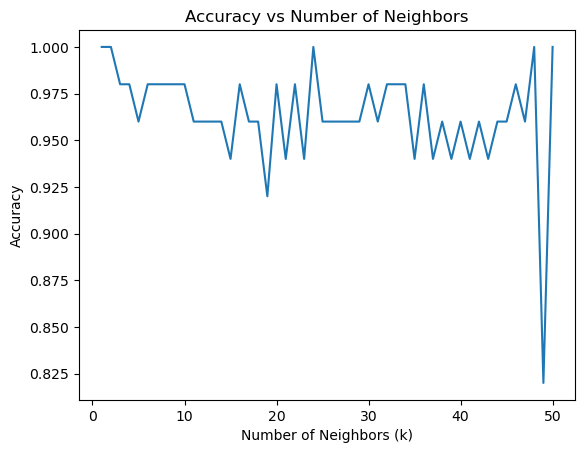

In [5]:
# 3) [bonus 5 pts] Use Manhattan instead of Euclidean and repeat Q. 1)-2

accuracies_manhattan = compute_accuracy(X_train, y_train, manhattan)
plt.plot(range(1, len(X_train) + 1), accuracies_manhattan, label="Manhattan")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors")
plt.show()


# 17. Bagging

In [6]:
# 17. (coding) bagging

import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# size of each sample
# you can choose your own sample_size
sample_size = int(0.2 * len(X_train))
# Store each trained model
list_models = []
# number of decision trees
no_classifiers = 10


In [7]:
#17. 1)-1
# Train each model on a bootstrap
for _ in range(no_classifiers):
    # Creating a bootstrap sample
    indices = np.random.choice(len(X_train), size=sample_size, replace=True)
    X_sample = X_train[indices]
    y_sample = y_train[indices]
    
    # Train a decision tree 
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_sample, y_sample)

    # Add the trained decision tree
    list_models.append(model)

In [8]:
# 1)-2 
# Each model makes a prediction on X_test
predictions = []
for model in list_models:
    predictions.append(model.predict(X_test))

# Compute final prediction using majority voting
final_predictions = []
for i in range(len(X_test)):
    # Collect predictions for the i-th sample
    preds = [pred[i] for pred in predictions]
    # Majority vote
    most_common = Counter(preds).most_common(1)[0][0]
    final_predictions.append(most_common)

# Show the final predictions of X_test
final_predictions = np.array(final_predictions)
print("\fFinal Predictions:", final_predictions)

# Accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Final Predictions: [2 0 0 2 0 1 1 1 2 1 1 2 2 2 1 1 1 0 1 2 1 0 2 0 1 2 0 2 1 2 1 1 2 1 2 1 1
 2 0 1 1 1 2 2 0]
Accuracy: 86.67%


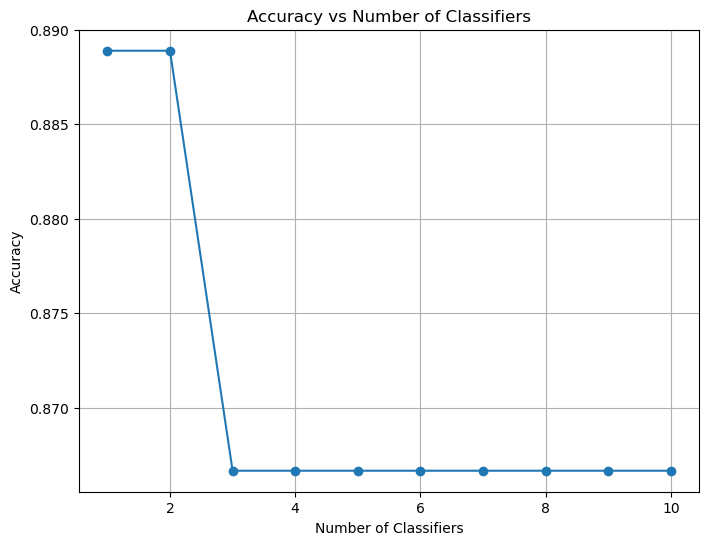

In [9]:
# 2) [4 pts] Plot a graph accuracy vs number of classifiers

accuracies = []
for n in range(1, no_classifiers + 1):
    # Use the first n classifiers
    subset_predictions = predictions[:n]
    final_subset_predictions = []
    for i in range(len(X_test)):
        preds = [pred[i] for pred in subset_predictions]
        most_common = Counter(preds).most_common(1)[0][0]
        final_subset_predictions.append(most_common)

    accuracies.append(accuracy_score(y_test, final_subset_predictions))

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, no_classifiers + 1), accuracies, marker='o')
plt.title('Accuracy vs Number of Classifiers')
plt.xlabel('Number of Classifiers')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [10]:
# Libraries
from sklearn.ensemble import RandomForestClassifier

# 3) Instead of decision tree, use another classifier and repeat q. 1)-2).

list_models_rf = []
for _ in range(no_classifiers):
    indices = np.random.choice(len(X_train), size=sample_size, replace=True)
    X_sample = X_train[indices]
    y_sample = y_train[indices]

    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(X_sample, y_sample)
    list_models_rf.append(model)

rf_predictions = []
for model in list_models_rf:
    rf_predictions.append(model.predict(X_test))

rf_final_predictions = []
for i in range(len(X_test)):
    preds = [pred[i] for pred in rf_predictions]
    most_common = Counter(preds).most_common(1)[0][0]
    rf_final_predictions.append(most_common)

rf_accuracy = accuracy_score(y_test, rf_final_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9111111111111111


# 18 - Gradient Boosting

In [11]:
# Importing Libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [12]:
# Step 18.1)-3: Compute residuals and update Y_train for each step
# My own data
X_train = np.array([[1], [2], [3], [4], [5]])
Y_train = np.array([1.8, 3.2, 5.5, 6.4, 8.8])

# Visualize the data (Optional)
print("Training Data (X_train, Y_train):")
print(X_train, Y_train)

# Compute the mean of Y_train, which is the first weak classifier h0
h0 = np.mean(Y_train)
H_t = [h0]  # Ensemble starts with h0
print("\nInitial weak classifier h0 (mean of Y_train):", h0)

Training Data (X_train, Y_train):
[[1]
 [2]
 [3]
 [4]
 [5]] [1.8 3.2 5.5 6.4 8.8]

Initial weak classifier h0 (mean of Y_train): 5.14


In [13]:
# 18. 1)-4 
# Gradient Boosting setup with 3 itiration
T = 3 
learning_rate = 0.1 

In [14]:
# Gradient Boosting iterations
for t in range(1, T):
    # Compute the residuals errors
    y_pred = np.full(Y_train.shape, h0)  # Initialize predictions with h0
    for classifier in H_t[1:]:
        y_pred += learning_rate * classifier.predict(X_train)  # Add weak classifiers

    residuals = Y_train - y_pred  # Compute residuals
    print(f"\nIteration {t}:")
    print("Residuals (Y_train - y_pred):", residuals)

    Y_train_residual = residuals

    ht = DecisionTreeRegressor(max_depth=1)
    ht.fit(X_train, Y_train_residual)
    H_t.append(ht)  # Add ht to the ensemble

    print("Visualization of the weak classifier ht:")
    print(export_text(ht, feature_names=["X"]))

    y_pred += learning_rate * ht.predict(X_train)
    print("Updated predictions (y_pred):", y_pred)

    loss = np.sum(residuals * ht.predict(X_train))
    if loss < 0:
        print("\nLoss is negative & updating the ensemble H_t.")
        continue
    else:
        print("\nLoss is not negative & stopping the ensemble.")
        break


Iteration 1:
Residuals (Y_train - y_pred): [-3.34 -1.94  0.36  1.26  3.66]
Visualization of the weak classifier ht:
|--- X <= 2.50
|   |--- value: [-2.64]
|--- X >  2.50
|   |--- value: [1.76]

Updated predictions (y_pred): [4.876 4.876 5.316 5.316 5.316]

Loss is not negative & stopping the ensemble.


In [15]:
print("\nFinal Ensemble H_t:")
for idx, clf in enumerate(H_t):
    if idx == 0:
        print(f"h0 (mean): {clf}")
    else:
        print(f"h{idx}: {export_text(clf, feature_names=['X'])}")


Final Ensemble H_t:
h0 (mean): 5.14
h1: |--- X <= 2.50
|   |--- value: [-2.64]
|--- X >  2.50
|   |--- value: [1.76]



In [16]:
#Done